# A Trading Strategy using US Stock Data



## Project: Designing an algorithmic Trading Strategy to fetch US stock data using API and analyzing it.



In [1]:
# importing all required libraries
import pandas as pd
from alpha_vantage.timeseries import TimeSeries
import seaborn as sns
import matplotlib.pyplot as plt
from pyalgotrading.strategy.strategy_base import StrategyBase
from pyalgotrading.constants import *
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator

In [6]:
#  declaring script data class
class ScriptData:
    def __init__(self):
        self.api_key = 'ZEBKSN42PWX4C93X' 
        self.data = {}                                   # declaring data and meta for future use
        self.meta = {}

        
    # fetching US Stock data using Alpha Vantage and converting dtype json to pandas. 

    def fetch_intraday_data(self, symbol):
        script = TimeSeries(key=self.api_key, output_format='pandas')
        data, meta = script.get_intraday(symbol)          # getting intraday data for the given symbol
        self.data = data                                  # The variable data stores the actual data on which analysis will be performed 
        self.meta = meta                                  # meta contains information regarding our dataset.
        return self.data
    
    
    # Converts fetched intraday data as a pandas DataFrame

    def convert_intraday_data(self, symbol):
        if self.data is not None:
            # Renaming the columns as per desired output.
            self.data.rename(columns={'date': 'timestamp', '1. open': 'open', '2. high': 'high', '3. low': 'low', '4. close': 'close', '5. volume': 'volume'}, inplace=True)
        return self.data
    
    
#Additional methods for overloading the following operations:

    # Overloading the operator for fetching data for a particular symbol
    def __getitem__(self, symbol):
        if self.data is not None:
            self.data = self.data.reset_index()
            return self.convert_intraday_data(symbol)
        
        
    # Overloading the operator for setting data for a particular symbol   
    def __setitem__(self, symbol, data):
        self.data[symbol] = data
  

    # Overloading the 'in' operator to check if a symbol exists in the metadata
    def __contains__(self, symbol):
        if "2. Symbol" in self.meta:
            return symbol in self.meta["2. Symbol"]

In [7]:
# producing desired output
script_data = ScriptData()

script_data.fetch_intraday_data('GOOGL')
script_data.convert_intraday_data("GOOGL")
script_data['GOOGL']

,timestamp,open,high,low,close,volume
0,2023-02-17 20:00:00,94.290,94.29,94.250,94.27,10570.0
1,2023-02-17 19:45:00,94.320,94.32,94.230,94.26,1592.0
2,2023-02-17 19:30:00,94.260,94.31,94.230,94.26,5439.0
3,2023-02-17 19:15:00,94.290,94.32,94.270,94.27,3252.0
4,2023-02-17 19:00:00,94.250,94.29,94.250,94.29,1887.0
...,...,...,...,...,...,...
95,2023-02-16 12:15:00,96.945,96.99,96.530,96.88,900381.0
96,2023-02-16 12:00:00,96.830,97.09,96.815,96.95,714856.0
97,2023-02-16 11:45:00,96.820,96.97,96.530,96.83,1200905.0
98,2023-02-16 11:30:00,97.190,97.20,96.690,96.81,1498373.0


In [8]:
'GOOGL' in script_data

True

In [9]:
script_data.fetch_intraday_data("AAPL")
script_data.convert_intraday_data("AAPL")
script_data['AAPL']

,timestamp,open,high,low,close,volume
0,2023-02-17 20:00:00,152.5600,152.6400,152.5500,152.6400,8075.0
1,2023-02-17 19:45:00,152.5600,152.6000,152.5500,152.5600,5131.0
2,2023-02-17 19:30:00,152.5500,152.5700,152.5500,152.5700,2655.0
3,2023-02-17 19:15:00,152.6200,152.6300,152.5500,152.5500,4504.0
4,2023-02-17 19:00:00,152.6200,152.6300,152.5600,152.6200,5858.0
...,...,...,...,...,...,...
95,2023-02-16 12:15:00,155.0650,155.5000,155.0200,155.4301,1148890.0
96,2023-02-16 12:00:00,155.2800,155.5000,155.0100,155.0700,1559793.0
97,2023-02-16 11:45:00,155.2500,155.4450,155.0501,155.2850,1220633.0
98,2023-02-16 11:30:00,155.0803,155.3999,154.9200,155.2499,1484408.0


In [10]:
'AAPL' in script_data

True

In [11]:
'NVDA' in script_data

False

In [12]:
# Defining the function 'indicator1' that takes a DataFrame 'df' and an integer 'timeperiod' as input
def indicator1(df, timeperiod):
    # Calculate moving average of 'close' column
    ma = df['close'].rolling(window=timeperiod).mean()

    # Create new DataFrame with 'timestamp' and 'indicator'
    new_df = pd.DataFrame({'timestamp': df['timestamp'], 'indicator': ma})
    return new_df


In [13]:
# indicator1(script_data['GOOGL'], timeperiod = 5)

In [14]:
# indicator1(script_data['AAPL'], timeperiod = 5)

In [15]:
class Strategy:
    def __init__(self,symbol):
        # initialize variables
        self.symbol = symbol
        self.api_key = 'ZEBKSN42PWX4C93X'
        self.script_data = ScriptData()
        self.timeperiod = 5
        self.df = {}
     
    
        
    # fetch intraday data
    def get_script_data(self):
        # fetch intraday data for the symbol
        self.df = self.script_data.fetch_intraday_data(self.symbol)
        
        # reset the index of the DataFrame and rename columns 
        self.df = self.df.reset_index()
        self.df.rename(columns={'date': 'timestamp', '1. open': 'open', '2. high': 'high', '3. low': 'low', '4. close': 'close', '5. volume': 'volume'}, inplace=True)
        
        # return the updated DataFrame
        return self.df
    
    
    
    def get_signals(self): 
        # compute indicator data on close of 'df'
        indicator_data = indicator1(self.df, self.timeperiod)['indicator']
        
        # initialize signals DataFrame
        signals = pd.DataFrame({'timestamp': self.df['timestamp']})
        
        # calculate buy and sell signals
        signals['signal'] = 'NO_SIGNAL'              # set all signal values to 'NO_SIGNAL' by default
        signals.loc[indicator_data > self.df['close'], 'signal'] = 'BUY'
        signals.loc[indicator_data < self.df['close'], 'signal'] = 'SELL'
        signals = signals[signals['signal'].isin(['BUY', 'SELL'])]

        return signals

In [16]:
# calling the class and its functions to produce desired output
strategy = Strategy('NVDA')
strategy.get_script_data()
strategy.get_signals()

,timestamp,signal
4,2023-02-17 19:00:00,SELL
5,2023-02-17 18:45:00,BUY
6,2023-02-17 18:30:00,SELL
7,2023-02-17 18:15:00,BUY
8,2023-02-17 18:00:00,BUY
...,...,...
95,2023-02-16 12:15:00,BUY
96,2023-02-16 12:00:00,BUY
97,2023-02-16 11:45:00,BUY
98,2023-02-16 11:30:00,BUY


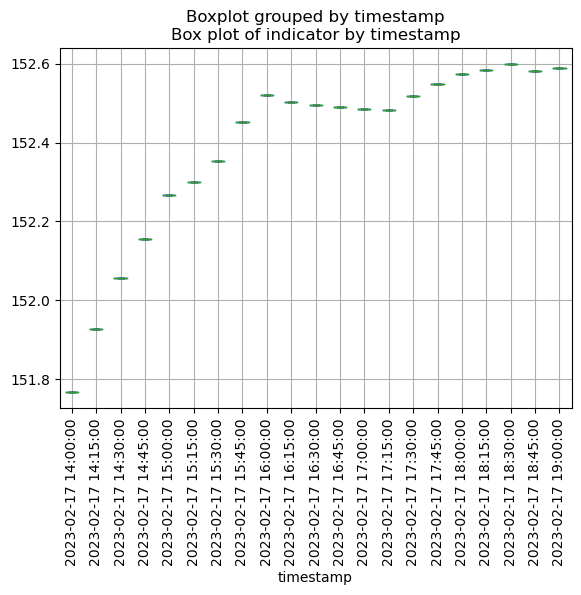

In [20]:
a = indicator1(script_data['GOOGL'], timeperiod = 5)

def plot1():
    b = a[4:25]
    # Create a box plot of 'indicator' column grouped by 'timestamp' column
    b.boxplot(column='indicator', by='timestamp', rot=90)

    # Add a title to the plot
    plt.title('Box plot of indicator by timestamp')

    # Show the plot
    plt.show()
        
plot1()